# Quickstart


## PW
A example of PW calculation.

In [2]:
from ase_quantumespresso.espresso import Espresso, EspressoProfile
from ase.build import bulk


atoms = bulk("Si")

pseudopotentials = {"Si": "Si.pbe-nl-rrkjus_psl.1.0.0.UPF"}
pseudo_dir = "/home/xing/data/ase/espresso_pseudo"
input_data = {
    "control": {"calculation": "scf"},
    "system": {"ecutwfc": 30, "ecutrho": 200,
               "occupations": "smearing",
                "degauss": 0.01,
                },
}

# export OMP_NUM_THREADS=1

profile = EspressoProfile(command="pw.x", pseudo_dir=pseudo_dir)
calc = Espresso(
    profile=profile,
    pseudopotentials=pseudopotentials,
    input_data=input_data,
    directory="calculation",
    kpts=[8, 8, 8],
)
atoms.calc = calc
energy = atoms.get_potential_energy()
print("energy:", energy)

INFO:xmlschema:Resource 'XMLSchema.xsd' is already loaded


energy: -278.0726613506829


Here are the results of the calculation:

In [4]:
for key in atoms.calc.results:
    print(key)


output_band
output_trajectory
output_structure
output_parameters
exit_code
energy
atoms


## Dos


In [5]:
from ase_quantumespresso.dos import DosTemplate
from ase_quantumespresso.espresso import Espresso, EspressoProfile

profile = EspressoProfile(command="dos.x", pseudo_dir=".")
input_data = {}
calc = Espresso(profile=profile, template=DosTemplate(),
                input_data=input_data,
                directory="calculation",)
results = calc.get_property("dos")

Plot the DOS:

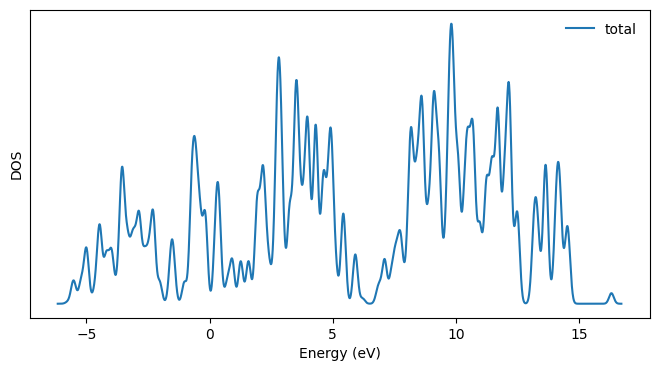

In [7]:
import matplotlib.pyplot as plt

dos_data = calc.results["dos"]
plt.figure(figsize = (8, 4))
plt.plot(dos_data['x']["array"], dos_data['y']["arrays"][1], label='total')
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.legend(frameon=False)


## Projwfc


In [1]:
from ase_quantumespresso.projwfc import ProjwfcTemplate
from ase_quantumespresso.espresso import Espresso, EspressoProfile

profile = EspressoProfile(command="projwfc.x", pseudo_dir=".")
input_data = {}
calc = Espresso(profile=profile, template=ProjwfcTemplate(),
                input_data=input_data,
                directory="calculation",)
results = calc.get_property("projections")

INFO:xmlschema:Resource 'XMLSchema.xsd' is already loaded


Plot the projected DOS:

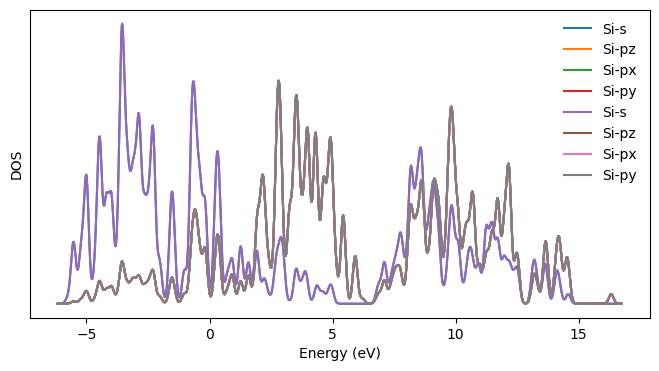

In [2]:
import matplotlib.pyplot as plt

orbitals = calc.results["projections"].orbitals
pdos_data = calc.results["projections"].list_of_pdos
energy_data = calc.results["projections"].list_of_energy
plt.figure(figsize = (8, 4))
for i in range(len(pdos_data)):
    orbital_data = orbitals[i].get_orbital_dict()
    kind_name = orbital_data["kind_name"]
    orbital = orbitals[i].get_name_from_quantum_numbers(orbital_data["angular_momentum"], orbital_data["magnetic_number"]
        ).lower()
    plt.plot(energy_data[i], pdos_data[i], label=f"{kind_name}-{orbital}")
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.legend(frameon=False)
